In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [57]:
data = pd.read_csv('C:/Users/Juan Carlos/Downloads/winequalityN.csv', sep=',', header=0)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
# Formatting and adding a new column
data['great_wine'] = np.where(data['quality']>=8,1,0)
data = data.drop('quality', axis='columns')

le_type = LabelEncoder()

data = data.dropna()
data['type'] = le_type.fit_transform(data['type'])
data.head()



Dataset:: 


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,great_wine
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [59]:
train, test = train_test_split(data, random_state=42)
X_train = train[train.columns[0:11]]
y_train = train['great_wine']
X_test = test[test.columns[0:11]]
y_test = test['great_wine']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neural_network import MLPClassifier
import time
start = time.time()
MLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)
MLP.fit(X_train, y_train.values.ravel())
end = time.time()

In [36]:
predictions = MLP.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix


print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("RunTime for 10 hidden layers: ", end-start)

[[1550   14]
 [  47    5]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1564
           1       0.26      0.10      0.14        52

    accuracy                           0.96      1616
   macro avg       0.62      0.54      0.56      1616
weighted avg       0.95      0.96      0.95      1616

RunTime for 10 hidden layers:  5.0215513706207275


In [52]:
# 5 Hidden Layers
start = time.time()
MLP_5 = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=2000)
MLP_5.fit(X_train, y_train.values.ravel())
end = time.time()

predictions = MLP_5.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("RunTime for 5 hidden layers: ", end-start)

[[1564    0]
 [  52    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1564
           1       0.00      0.00      0.00        52

    accuracy                           0.97      1616
   macro avg       0.48      0.50      0.49      1616
weighted avg       0.94      0.97      0.95      1616

RunTime for 5 hidden layers:  1.7418525218963623


C:\Users\Juan Carlos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juan Carlos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juan Carlos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# 20 Hidden Layers
start = time.time()
MLP_20 = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=2000)
MLP_20.fit(X_train, y_train.values.ravel())
end = time.time()

predictions = MLP_20.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("RunTime for 20 hidden layers: ", end-start)

[[1538   26]
 [  38   14]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1564
           1       0.35      0.27      0.30        52

    accuracy                           0.96      1616
   macro avg       0.66      0.63      0.64      1616
weighted avg       0.96      0.96      0.96      1616

RunTime for 20 hidden layers:  8.73061490058899


In [50]:
# 100 Hidden Layers
start = time.time()
MLP_100 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000)
MLP_100.fit(X_train, y_train.values.ravel())
end = time.time()

predictions = MLP_100.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("RunTime for 100 hidden layers: ", end-start)

[[1547   17]
 [  36   16]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1564
           1       0.48      0.31      0.38        52

    accuracy                           0.97      1616
   macro avg       0.73      0.65      0.68      1616
weighted avg       0.96      0.97      0.96      1616

RunTime for 100 hidden layers:  4.400953054428101


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                192       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
None


Train on 4847 samples, validate on 1616 samples
Epoch 1/50
4847/4847 [==============================] - 0s 44us/step - loss: 0.5793 - accuracy: 0.7613 - val_loss: 0.4132 - val_accuracy: 0.9635
Epoch 2/50
4847/4847 [==============================] - 0s 17us/step - loss: 0.3480 - accuracy: 0.9525 - val_loss: 0.2606 - val_accuracy: 0.9678
Epoch 3/50
4847/4847 [==============================] - 0s 15us/step - loss: 0.2440 - accuracy: 0.9662 - val_loss: 0.1914 - val_accuracy: 0.9678
Epoch 4/50
4847/4847 [==============================] - 0s 15us/step - loss: 0.1915 - accuracy: 0.9680 - val_loss: 0.1609 - val_accuracy: 0.9678
Epoch 5/50
4847/4847 [==============================] - 0s 21us/step - loss: 0.1712 - accuracy: 0.9695 - val_loss: 0.1474 - val_accuracy: 0.9678
Epoch 6/50
4847/4847 [==============================] - 0s 15us/step - loss: 0.1586 - accuracy: 0.9688 - val_loss: 0.1406 - val_accuracy: 0.9678
Epoch 7/50
4847/4847 [==============================] - 0s 16us/step - loss: 0.156

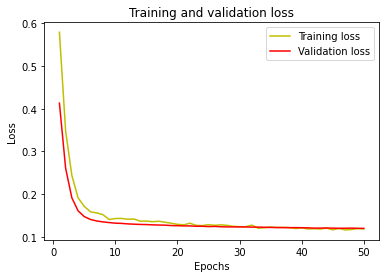

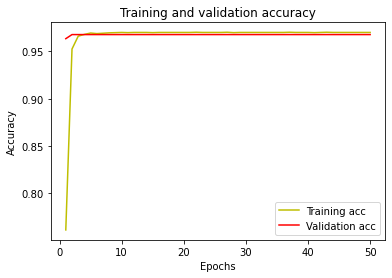

In [62]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train ,verbose=1, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test))

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")



# prediction_test = model.predict(X_test)    
# print(y_test, prediction_test)
# print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()